<h1 style='background:#0E2954; border:3; color:#F2BE22; border-color:#F2BE22; border-style:double;'><center> Identifying Age-Related Conditions</center></h1> 

<center>
<img style="align:center;" src="https://img.freepik.com/free-vector/man-age-progress-concept-illustration-old-adult-male-young-age-man_1284-41438.jpg" width=900>
</center>

<h1 style='background:#0E2954; border:3; color:#F2BE22; border-color:#F2BE22; border-style:double;'><center> TABLE OF CONTENT</center></h1> 


<a id='1' style="color:#F2BE22 ">1. IMPORTING LIBRARIES</a>

<a id='2' style="color:#F2BE22 ">2. LOADING DATASET</a>

<a id='3' style="color:#F2BE22 ">3. DATA DESCRIPTION</a>

<a id='4' style="color:#F2BE22 ">4. EXPLORATORY DATA ANALYSIS</a>

<a id='6' style="color:#F2BE22 ">5. FEATURE ENGINEERING</a>

<a id='5' style="color:#F2BE22 ">6. MISSING VALUES</a>

<a id='7' style="color:#F2BE22 ">7. DATA VISUALIZATION</a>

<a id='8' style="color:#F2BE22 ">8. OUTLIER DETECTION</a>

<a id='9' style="color:#F2BE22 ">9. DATA PREPROCESSING</a>

<a id='10' style="color:#F2BE22 ">10. MODEL TRAINING AND EVALUATING</a>

<a id='11' style="color:#F2BE22 ">11. FEATURE IMPORTANCE</a>

<a id='12' style="color:#F2BE22 ">12 AUC-ROC</a>

<a id='13' style="color:#F2BE22 ">13. MODEL TUNING</a>

<a id='14' style="color:#F2BE22 ">14. CONCLUSION</a>

                      
</div>


<h1 style='background:#0E2954; border:3; color:#F2BE22; border-color:#F2BE22; border-style:double;'><center> IMPORTING LIBRARIES</center></h1> 

In [171]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import joblib
import pickle
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

<h1 style='background:#0E2954; border:3; color:#F2BE22; border-color:#F2BE22; border-style:double;'><center>LOADING DATASET</center></h1> 

In [172]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

df=train.copy()
df1=test.copy()
df.head().style.set_properties(**{'background-color': 'black',
                            'color': '#F2BE22',
                            'border-color': 'white'})

<h1 style='background:#0E2954; border:3; color:#F2BE22; border-color:#F2BE22; border-style:double;'><center>DATA DESCRIPTION
</center></h1> 

* The competition data comprises over fifty anonymized health characteristics linked to three age-related conditions. Your goal is to predict whether a subject has or has not been diagnosed with one of these conditions -- a binary classification problem.

* Note that this is a Code Competition, in which the actual test set is hidden. In this version, we give some sample data in the correct format to help you author your solutions. When your submission is scored, this example test data will be replaced with the full test set. There are about 400 rows in the full test set.

### Files and Field Descriptions
##### train.csv - The training set.
* Id Unique identifier for each observation.
* AB-GL Fifty-six anonymized health characteristics. All are numeric except for EJ, which is categorical.
* Class A binary target: 1 indicates the subject has been diagnosed with one of the three conditions, 0 indicates they have not.
##### test.csv - The test set. 
* Your goal is to predict the probability that a subject in this set belongs to each of the two classes.

* Epsilon The date the data for this subject was collected. Note that all of the data in the test set was collected after the training set was collected.

<h1 style='background:#0E2954; border:3; color:#F2BE22; border-color:#F2BE22; border-style:double;'><center> EXPLORATORY DATA ANALYSIS
</center></h1> 

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [174]:
df.describe()

AB       AF      AH     AM     AR     AX     AY     AZ      BC  \
count 617.00   617.00  617.00 617.00 617.00 617.00 617.00 617.00  617.00   
mean    0.48  3502.01  118.62  38.97  10.13   5.55   0.06  10.57    8.05   
std     0.47  2300.32  127.84  69.73  10.52   2.55   0.42   4.35   65.17   
min     0.08   192.59   85.20   3.18   8.14   0.70   0.03   3.40    1.23   
25%     0.25  2197.35   85.20  12.27   8.14   4.13   0.03   8.13    1.23   
50%     0.35  3120.32   85.20  20.53   8.14   5.03   0.03  10.46    1.23   
75%     0.56  4361.64  113.74  39.14   8.14   6.43   0.04  12.97    5.08   
max     6.16 28688.19 1910.12 630.52 178.94  38.27  10.32  38.97 1463.69   

           BD      BN      BP     BQ        BR       BZ      CB     CC    CD   \
count   617.00 617.00  617.00 557.00    617.00   617.00  615.00 614.00 617.00   
mean   5350.39  21.42  231.32  98.33   1218.13   550.63   77.10   0.69  90.25   
std    3021.33   3.48  183.99  96.48   7575.29  2076.37  159.05   0.26  51.59   
min    1693.62   9.89   72.95   1.33     51.22   257.43   12.50   0.18  23.39   
25%    4155.70  19.42  156.85  27.83    424.99   257.43   23.32   0.56  64.72   
50%    4997.96  21.19  193.91  61.64    627.42   257.43   42.55   0.66  79.82   
75%    6035.89  23.66  247.80 134.01    975.65   257.43   77.31   0.77  99.81   
max   53060.60  29.31 2447.81 344.64 179250.25 50092.46 2271.44   4.10 633.53   

          CF     CH     CL     CR     CS     CU    CW      DA      DE     DF  \
count 617.00 617.00 617.00 617.00 617.00 617.00 617.00 617.00  617.00 617.00   
mean   11.24   0.03   1.40   0.74  36.92   1.38  27.17  51.13  401.90   0.63   
std    13.57   0.01   1.92   0.28  17.27   0.54  14.65  21.21  317.75   1.91   
min     0.51   0.00   1.05   0.07  13.78   0.14   7.03   6.91   36.00   0.24   
25%     5.07   0.02   1.05   0.59  29.78   1.07   7.03  37.94  188.82   0.24   
50%     9.12   0.03   1.05   0.73  34.84   1.35  36.02  49.18  307.51   0.24   
75%    13.57   0.03   1.23   0.86  40.53   1.66  37.94  61.41  507.90   0.24   
max   200.97   0.22  31.69   3.04 267.94   4.95  64.52 210.33 2103.41  37.90   

          DH      DI     DL     DN     DU     DV     DY     EB     EE  \
count 617.00  617.00 617.00 617.00 616.00 617.00 617.00 617.00 617.00   
mean    0.37  146.97  94.80  26.37   1.80   1.92  26.39   9.07   3.06   
std     0.11   86.08  28.24   8.04   9.03   1.48  18.12   6.20   2.06   
min     0.04   60.23  10.35   6.34   0.01   1.74   0.80   4.93   0.29   
25%     0.30  102.70  78.23  20.89   0.01   1.74  14.72   5.97   1.65   
50%     0.36  130.05  96.26  25.25   0.25   1.74  21.64   8.15   2.62   
75%     0.43  165.84 110.64  30.54   1.06   1.74  34.06  10.50   3.91   
max     1.06 1049.17 326.24  62.81 161.36  25.19 152.36  94.96  18.32   

            EG     EH     EL      EP      EU      FC     FD         FE     FI  \
count   617.00 617.00 557.00  617.00  617.00  616.00  617.00    617.00 617.00   
mean   1731.25   0.31  69.58  105.06   69.12   71.34    6.93  10306.81  10.11   
std    1790.23   1.85  38.56   68.45  390.19  165.55   64.75  11331.29   2.93   
min     185.59   0.00   5.39   78.53    3.83    7.53    0.30   1563.14   3.58   
25%    1111.16   0.00  30.93   78.53    4.32   25.82    0.30   5164.67   8.52   
50%    1493.82   0.09  71.95   78.53   22.64   36.39    1.87   7345.14   9.95   
75%    1905.70   0.24 109.13  112.77   49.09   56.71    4.88  10647.95  11.52   
max   30243.76  42.57 109.13 1063.59 6501.26 3030.66 1578.65 143224.68  35.85   

          FL      FR     FS     GB      GE        GF     GH     GI     GL  \
count 616.00  617.00 615.00 617.00  617.00    617.00 617.00 617.00 616.00   
mean    5.43    3.53   0.42  20.72  131.71  14679.60  31.49  50.58   8.53   
std    11.50   50.18   1.31   9.99  144.18  19352.96   9.86  36.27  10.33   
min     0.17    0.50   0.07   4.10   72.61     13.04   9.43   0.90   0.00   
25%     0.17    0.50   0.07  14.04   72.61   2798.99  25.03  23.01   0.12   
50%     3.03    1.13   0

In [175]:
print('Shape of the data:',df.shape)
print("****************************")
print('Columns of the data:',df.columns)
print("****************************")
print('Number of unique values:',df.nunique())
print("****************************")
print('Number of duplicated values:',df.duplicated().sum())

Shape of the data: (617, 58)
****************************
Columns of the data: Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')
****************************
Number of unique values: Id       617
AB       217
AF       599
AH       227
AM       605
AR       130
AX       427
AY       148
AZ       484
BC       259
BD       617
BN        53
BP       612
BQ       515
BR       566
BZ       115
CB       553
CC       602
CD       584
CF       586
CH       135
CL       123
CR       595
CS       576
CU       307
CW       426
DA       611
DE       616
DF       137
DH       191
DI       571
DL       604
DN       576
DU       253
DV        39

In [176]:
# grabbing numeric and categorical columns:
def cat_num_cols(dataframe,cat_th=12,car_th=20):
    
    cat_cols=[col for col in dataframe.columns if dataframe[col].dtypes=="O"]
    num_but_cat=[col for col in dataframe.columns if dataframe[col].nunique()<cat_th and 
                dataframe[col].dtypes!="O"]
    cat_but_car=[col for col in dataframe.columns if dataframe[col].nunique()>car_th and 
                dataframe[col].dtypes=="O"]
    cat_cols=cat_cols+num_but_cat
    cat_cols=[col for col in cat_cols if col not in cat_but_car]
    
    num_cols=[col for col in dataframe.columns if dataframe[col].dtypes!="O"]
    num_cols=[col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols,num_cols,cat_but_car,num_but_cat


num_but_cat,cat_but_car,cat_cols,num_cols=cat_num_cols(df)

Observations: 617
Variables: 58
cat_cols: 2
num_cols: 55
cat_but_car: 1
num_but_cat: 1


In [177]:
# distribution of categorical variables:


cat_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() <= 12]

colors = ['#7DBCE6','#EEBDEE','#EAEAAF','#8FE195','#E28181',
          '#87D8DB','#C2E37D','#DF93A4','#DCB778','#C497DE']


def cat_summary(dataframe, col):
    print(pd.DataFrame({col:df[col].value_counts(),
                       "Ratio":100*df[col].value_counts()/len(df)}))

    fig = make_subplots(rows=1,cols=1,
                        subplot_titles=('Distribution'))
    fig.add_trace(go.Bar(x=dataframe[col].value_counts().index,
                            y=dataframe[col].value_counts().values,
                            marker=dict(color=colors)),row=1,col=1)
    
    
  
    fig.update_layout(title = {'text': col,
                               'y':0.9,
                               'x':0.5,
                               'xanchor': 'center',
                               'yanchor': 'top'},
                      template = "plotly_dark",width=400,height=400)
    
    iplot(fig) # to show the plot in notebook with optimized design

for i in cat_cols:
    cat_summary(df,i)

     EJ  Ratio
EJ            
B   395  64.02
A   222  35.98


In [178]:
# distribution of numerical variables:

num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in ["id","Class"]]



colors = ['#7DBCE6','#EEBDEE','#EAEAAF','#8FE195','#E28181',
          '#87D8DB','#C2E37D','#DF93A4','#DCB778','#C497DE']


def num_summary(dataframe, col):

    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Quantiles','Distribution'))

    fig.add_trace(go.Histogram(x = dataframe[col],
                               xbins = dict(start = dataframe[col].min(),
                                            end = dataframe[col].max()),
                               showlegend = False,
                               name = str(col),
                               marker=dict(color=colors[6],
                                           line = dict(color = '#DBE6EC',
                                                       width = 1))
                              ),
                  row = 1, col = 1)
    
    fig.add_trace(go.Box(y=dataframe[col],
                         name = str(col),
                         showlegend = False,
                         marker_color = colors[7]),
                  row = 1, col = 2)
    
    
  
    fig.update_layout(title = {'text': col,
                               'y':0.9,
                               'x':0.5,
                               'xanchor': 'center',
                               'yanchor': 'top'},
                      template = "plotly_dark")
    
    iplot(fig)

for i in num_cols:
    num_summary(df,i)

In [179]:
# Balance of target feature:

px.histogram(df, x='Class', title='Balance of target feature', color='Class',template='plotly_dark',width=500, height=400)

<h1 style='background:#0E2954; border:3; color:#F2BE22; border-color:#F2BE22; border-style:double;'><center> MISSING VALUES
</center></h1> 

In [180]:
# show the missing values in dataset with ratio
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_tabl(df)

n_miss  ratio
BQ      60   9.72
EL      60   9.72
CC       3   0.49
CB       2   0.32
FS       2   0.32
DU       1   0.16
FC       1   0.16
FL       1   0.16
GL       1   0.16

In [181]:
# filling missing values with KNNImputer
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=15)
num=df.select_dtypes(include=['float64','int64'])    
for i in num.columns:
   df[i]=knn.fit_transform(df[[i]])
      
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_tabl(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []

<h1 style='background:#0E2954; border:3; color:#F2BE22; border-color:#F2BE22; border-style:double;'><center> OUTLIER DETECTION
</center></h1> 

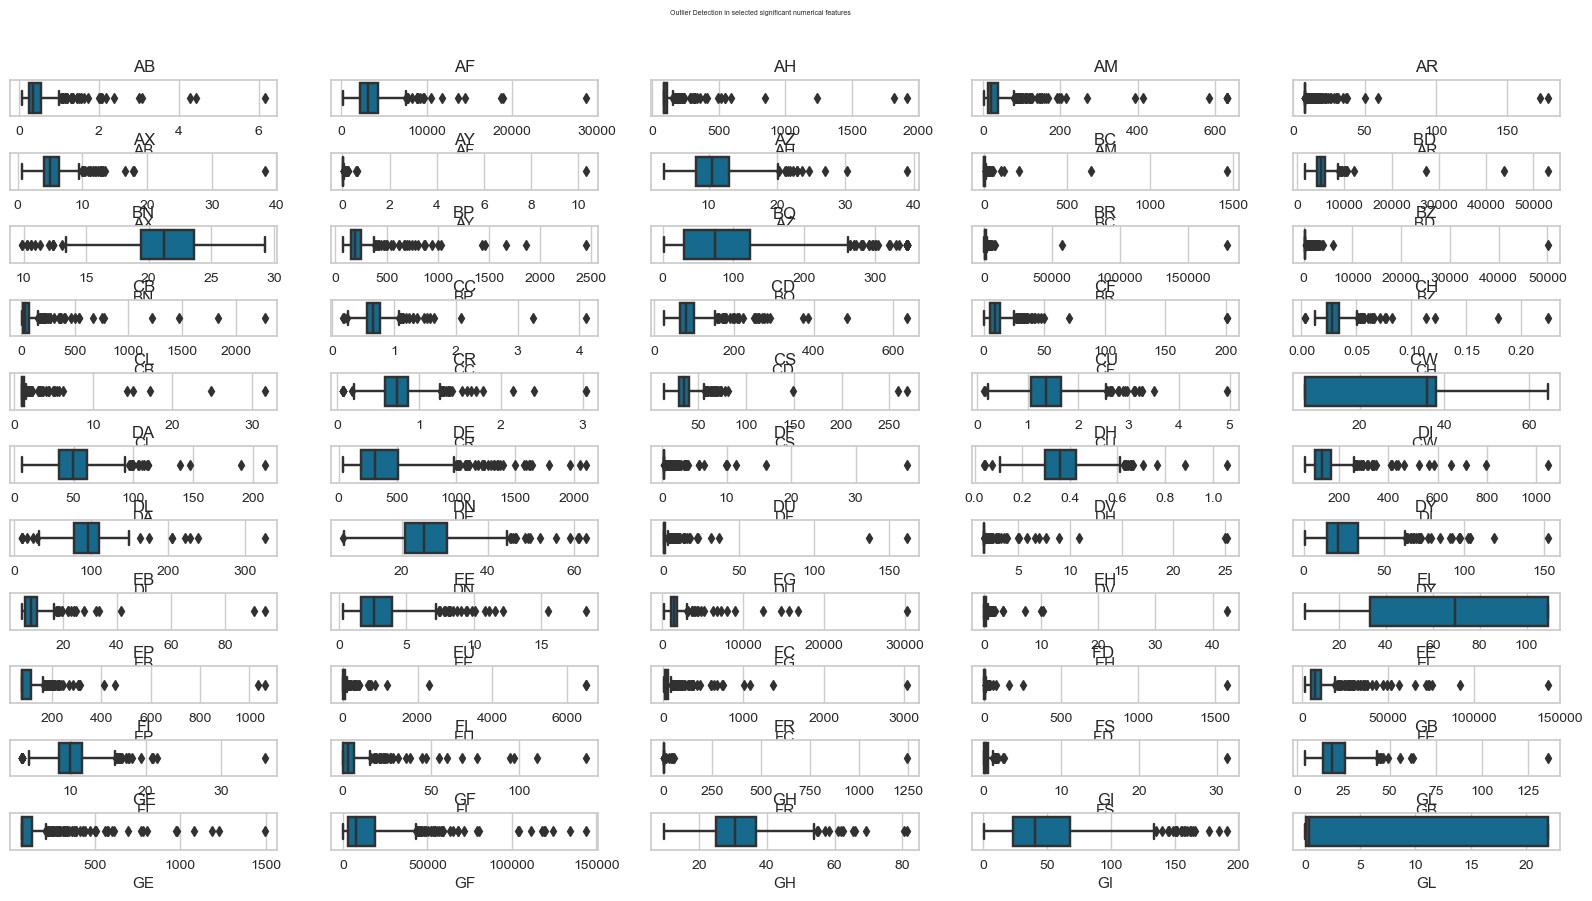

In [182]:
# Selecting related features:
num=df.select_dtypes(include=['int64','float64'])



fig, axs = plt.subplots(nrows=11, ncols=5, figsize=(20, 10))
plt.subplots_adjust(hspace=1)
fig.suptitle("Outlier Detection in selected significant numerical features", fontsize=5, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(num, axs.ravel()):
    # filter df for ticker and plot on specified axes
    sns.boxplot(data=num, x=ticker, ax=ax)
    # chart formatting
    ax.set_title(ticker.upper())


plt.show()

In [183]:
#  outlier threshold:
def outlier_thresholds(dataframe,col_name,q1=0.5,q3=0.95):
    q1=dataframe[col_name].quantile(q1)
    q3=dataframe[col_name].quantile(q3)
    IQR=q3-q1
    
    up_limit=q3+1.5*IQR
    low_limit=q1-1.5*IQR
    
    return low_limit,up_limit

# check outliers:
def check_outliers(dataframe,col_name):
    low_limit,up_limit=outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name]<low_limit) | (dataframe[col_name]>up_limit)].any(axis=None):
        return True 
   
    else:
        return False

In [184]:
# replacing outliers with thresholds:
def replace_with_mean(dataframe, col):
    #filling outliers with mean:
    low_limit,up_limit=outlier_thresholds(dataframe, col)
    outlier_lw=(df[col]<low_limit)
    outlier_upp=(df[col]>up_limit)


for col in num.columns:
    replace_with_mean(df, col)
    print("After filling with thresholds:")
    print(col + " : ",check_outliers(df,col))
  
    

After filling with thresholds:
AB :  True
After filling with thresholds:
AF :  True
After filling with thresholds:
AH :  True
After filling with thresholds:
AM :  True
After filling with thresholds:
AR :  True
After filling with thresholds:
AX :  True
After filling with thresholds:
AY :  True
After filling with thresholds:
AZ :  True
After filling with thresholds:
BC :  True
After filling with thresholds:
BD  :  True
After filling with thresholds:
BN :  True
After filling with thresholds:
BP :  True
After filling with thresholds:
BQ :  False
After filling with thresholds:
BR :  True
After filling with thresholds:
BZ :  True
After filling with thresholds:
CB :  True
After filling with thresholds:
CC :  True
After filling with thresholds:
CD  :  True
After filling with thresholds:
CF :  True
After filling with thresholds:
CH :  True
After filling with thresholds:
CL :  True
After filling with thresholds:
CR :  True
After filling with thresholds:
CS :  True
After filling with thresholds:


<h1 style='background:#0E2954; border:3; color:#F2BE22; border-color:#F2BE22; border-style:double;'><center> DATA VISUALIZATION
</center></h1> 

Text(0.5, 1.0, 'Correlation Between Features')

<Figure size 4000x2000 with 0 Axes>

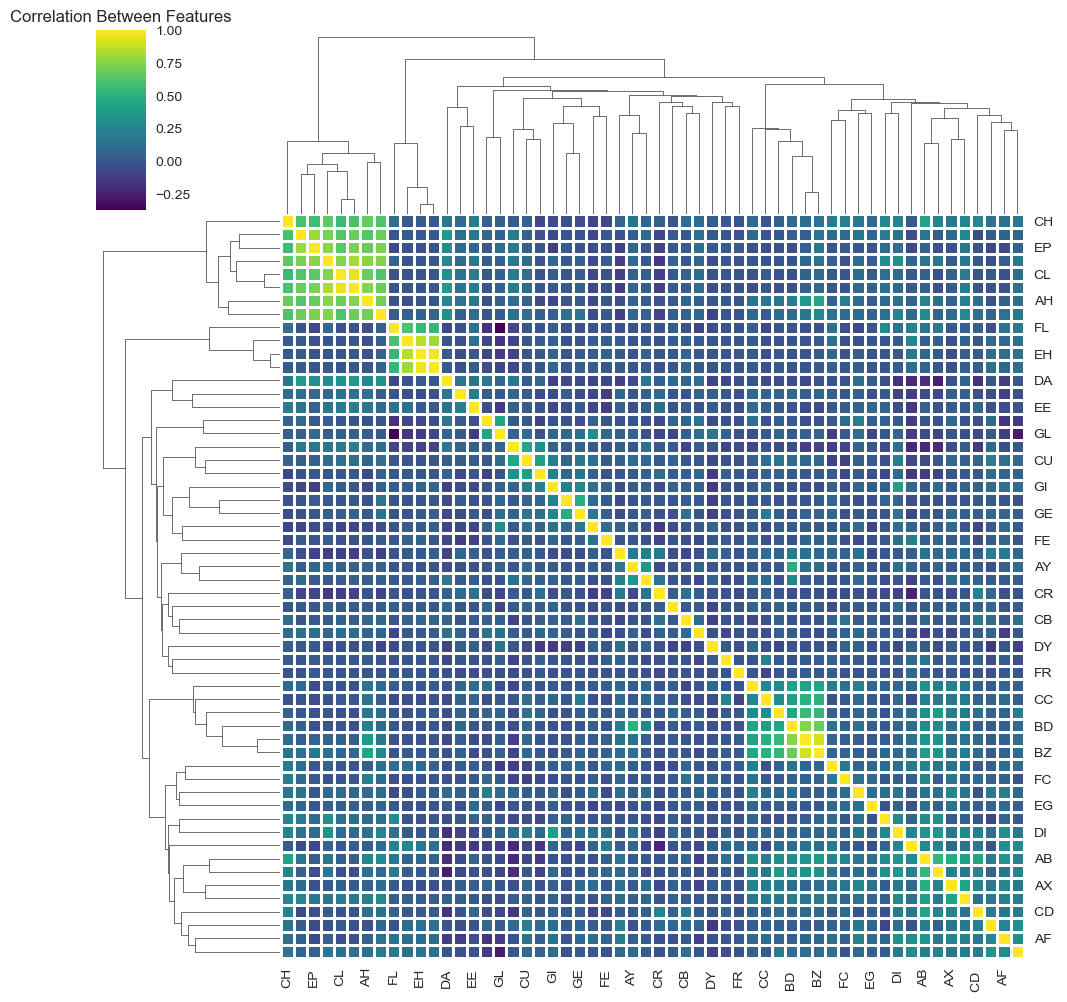

In [185]:
num_cols = df.select_dtypes(include=np.number)

corr=num_cols.corr()
plt.figure(figsize=(40,20))
sns.clustermap(corr,cmap="viridis",linewidths=.75,fmt=".2f")
plt.title("Correlation Between Features")

<h1 style='background:#0E2954; border:3; color:#F2BE22; border-color:#F2BE22; border-style:double;'><center> DATA PREPROCESSING</center></h1> 

In [186]:
def label_encoder(df, column_name):
    if df[column_name].dtype == 'object':
        if df[column_name].nunique() <= 2:
            le = LabelEncoder()
            df[column_name] = le.fit_transform(df[column_name])
            return df
        elif df[column_name].nunique() > 2  and df[column_name].nunique() <= 10:
            ohe = OneHotEncoder()
            ohe_df = pd.DataFrame(ohe.fit_transform(df[[column_name]]).toarray())
            ohe_df.columns = [column_name + "_" + str(i) for i in ohe_df.columns]
            df = df.join(ohe_df)
            df = df.drop(column_name, axis=1)
            return df
        else:
            return df
        
    else:
        return df
    
for i in df.columns:
    df = label_encoder(df, i)
    
df.columns= [i.upper() for i in df.columns]
   
df.head()


ID   AB      AF     AH    AM   AR   AX   AY    AZ     BC     BD   \
0  000ff2bfdfe9 0.21 3109.03  85.20 22.39 8.14 0.70 0.03  9.81   5.56 4126.59   
1  007255e47698 0.15  978.76  85.20 36.97 8.14 3.63 0.03 13.52   1.23 5496.93   
2  013f2bd269f5 0.47 2635.11  85.20 32.36 8.14 6.73 0.03 12.82   1.23 5135.78   
3  043ac50845d5 0.25 3819.65 120.20 77.11 8.14 3.69 0.03 11.05   1.23 4169.68   
4  044fb8a146ec 0.38 3733.05  85.20 14.10 8.14 3.94 0.05  3.40 102.15 5728.73   

     BN     BP     BQ      BR     BZ    CB   CC   CD     CF   CH   CL   CR  \
0 22.60 175.64 152.71  823.93 257.43 47.22 0.56 23.39  4.85 0.02 1.05 0.07   
1 19.42 155.87  14.75   51.22 257.43 30.28 0.48 50.63  6.09 0.03 1.11 1.12   
2 26.48 128.99 219.32  482.14 257.43 32.56 0.50 85.96  5.38 0.04 1.05 0.70   
3 23.66 237.28  11.05  661.52 257.43 15.20 0.72 88.16  2.35 0.03 1.40 0.64   
4 24.01 324.55 149.72 6074.86 257.43 82.21 0.54 72.64 30.54 0.03 1.05 0.69   

     CS   CU   CW     DA     DE   DF   DH     DI    DL    DN   DU   DV    DY  \
0 13.78 1.30 36.21 69.08 295.57 0.24 0.28  89.25 84.32 29.66 5.31 1.74 23.19   
1 28.31 1.36 37.48 70.80 178.55 0.24 0.36 110.58 75.75 37.53 0.01 1.74 17.22   
2 39.36 1.01 21.46 70.82 321.43 0.24 0.21 120.06 65.47 28.05 1.29 1.74 36.86   
3 41.12 0.72 21.53 47.28 196.61 0.24 0.29 139.82 71.57 24.35 2.66 1.74 52.00   
4 31.72 0.83 34.42 74.07 200.18 0.24 0.21  97.92 52.84 26.02 1.14 1.74  9.06   

    EB   EE       EG   EH  EJ     EL    EP    EU     FC   FD        FE    FI  \
0 7.29 1.99  1433.17 0.95   1  30.88 78.53  3.83  13.39 10.27  9028.29  3.58   
1 4.93 0.86  1111.29 0.00   0 109.13 95.42 52.26  17.18  0.30  6785.00 10.36   
2 7.81 8.15  1494.08 0.38   1 109.13 78.53  5.39 224.21  8.75  8338.91 11.63   
3 7.39 3.81 15691.55 0.61   1  31.67 78.53 31.32  59.30  7.88 10965.77 14.85   
4 7.35 3.49  1403.66 0.16   1 109.13 91.99 51.14  29.10  4.27 16198.05 13.67   

    FL    FR   FS    GB     GE       GF    GH    GI    GL  CLASS  
0 7.30  1.74 0.09 11.34  72.61  2003.81 22.14 69.83  0.12   1.00  
1 0.17  0.50 0.57  9.29  72.61 27981.56 29.14 32.13 21.98   0.00  
2 7.71  0.98 1.20 37.08  88.61 13676.96 28.02 35.19  0.20   0.00  
3 6.12  0.50 0.28 18.53  82.42  2094.26 39.95 90.49  0.16   0.00  
4 8.15 48.50 0.12 16.41 146.11  8524.37 45.38 36.26  0.10   1.00

In [187]:
# label encoding:

for i in df.drop(["ID"],axis=1).columns:
    mm=MinMaxScaler(feature_range=(0,1))
    df[i]=mm.fit_transform(df[[i]])

df.head()

ID   AB   AF   AH   AM   AR   AX   AY   AZ   BC  BD    BN   BP  \
0  000ff2bfdfe9 0.02 0.10 0.00 0.03 0.00 0.00 0.00 0.18 0.00 0.05 0.65 0.04   
1  007255e47698 0.01 0.03 0.00 0.05 0.00 0.08 0.00 0.28 0.00 0.07 0.49 0.03   
2  013f2bd269f5 0.06 0.09 0.00 0.05 0.00 0.16 0.00 0.27 0.00 0.07 0.85 0.02   
3  043ac50845d5 0.03 0.13 0.02 0.12 0.00 0.08 0.00 0.22 0.00 0.05 0.71 0.07   
4  044fb8a146ec 0.05 0.12 0.00 0.02 0.00 0.09 0.00 0.00 0.07 0.08 0.73 0.11   

    BQ   BR   BZ   CB   CC  CD    CF   CH   CL   CR   CS   CU  CW    DA   DE  \
0 0.44 0.00 0.00 0.02 0.10 0.00 0.02 0.09 0.00 0.00 0.00 0.24 0.51 0.31 0.13   
1 0.04 0.00 0.00 0.01 0.08 0.04 0.03 0.13 0.00 0.35 0.06 0.25 0.53 0.31 0.07   
2 0.63 0.00 0.00 0.01 0.08 0.10 0.02 0.15 0.00 0.21 0.10 0.18 0.25 0.31 0.14   
3 0.03 0.00 0.00 0.00 0.14 0.11 0.01 0.12 0.01 0.19 0.11 0.12 0.25 0.20 0.08   
4 0.43 0.03 0.00 0.03 0.09 0.08 0.15 0.10 0.00 0.21 0.07 0.14 0.48 0.33 0.08   

    DF   DH   DI   DL   DN   DU   DV   DY   EB   EE   EG   EH   EJ   EL   EP  \
0 0.00 0.24 0.03 0.23 0.41 0.03 0.00 0.15 0.03 0.09 0.04 0.02 1.00 0.25 0.00   
1 0.00 0.32 0.05 0.21 0.55 0.00 0.00 0.11 0.00 0.03 0.03 0.00 0.00 1.00 0.02   
2 0.00 0.17 0.06 0.17 0.38 0.01 0.00 0.24 0.03 0.44 0.04 0.01 1.00 1.00 0.00   
3 0.00 0.25 0.08 0.19 0.32 0.02 0.00 0.34 0.03 0.20 0.52 0.01 1.00 0.25 0.00   
4 0.00 0.16 0.04 0.13 0.35 0.01 0.00 0.05 0.03 0.18 0.04 0.00 1.00 1.00 0.01   

    EU   FC  FD    FE   FI   FL   FR   FS   GB   GE   GF   GH   GI   GL  CLASS  
0 0.00 0.00 0.01 0.05 0.00 0.05 0.00 0.00 0.05 0.00 0.01 0.18 0.36 0.01   1.00  
1 0.01 0.00 0.00 0.04 0.21 0.00 0.00 0.02 0.04 0.00 0.19 0.27 0.16 1.00   0.00  
2 0.00 0.07 0.01 0.05 0.25 0.05 0.00 0.04 0.25 0.01 0.10 0.26 0.18 0.01   0.00  
3 0.00 0.02 0.00 0.07 0.35 0.04 0.00 0.01 0.11 0.01 0.01 0.43 0.47 0.01   0.00  
4 0.01 0.01 0.00 0.10 0.31 0.06 0.04 0.00 0.09 0.05 0.06 0.50 0.19 0.00   1.00

In [188]:
df.drop("ID",axis=1,inplace=True)

X=df.drop("CLASS",axis=1).values
y=df["CLASS"].values.reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)   

X_train shape: (493, 56)
X_test shape: (124, 56)
y_train shape: (493, 1)
y_test shape: (124, 1)


<h1 style='background:#0E2954; border:3; color:#F2BE22; border-color:#F2BE22; border-style:double;'><center> DATA MODELING AND EVALUATION
</center></h1> 

In [189]:
# BASE MODEL:

def base_model(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    knn=KNeighborsClassifier()
    svc=SVC()
    nb=GaussianNB()
    dtc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    xgb=XGBClassifier()
    gbc=GradientBoostingClassifier()
    abc=AdaBoostClassifier()
    lr=LogisticRegression()

    models = [knn, svc, nb, dtc, rfc, xgb,gbc, abc, lr]
    overral=pd.DataFrame(columns=["Model","Accuracy Score","F1 Score","ROC AUC Score","R2 Score",
                              "Cross Val Score","RMSE","MAE","MSE","precision_score","recall_score"])
    for model in models:
    
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        acc=accuracy_score(y_test,y_pred)
        f1=f1_score(y_test,y_pred)
        roc=roc_auc_score(y_test,y_pred)
        r2=r2_score(y_test,y_pred)
        cv=cross_val_score(model,X,y,cv=10).mean()
        rmse=np.sqrt(mean_squared_error(y_test,y_pred))
        mae=mean_absolute_error(y_test,y_pred)
        mse=mean_squared_error(y_test,y_pred)
        pr=precision_score(y_test,y_pred)
        rc=recall_score(y_test,y_pred)
    
        overral=overral._append({"Model":model.__class__.__name__,
                            "Accuracy Score":acc,
                            "F1 Score":f1,
                            "ROC AUC Score":roc,
                            "R2 Score":r2,
                            "Cross Val Score":cv,
                            "RMSE":rmse,
                            "MAE":mae,
                            "MSE":mse,
                            "precision_score":pr,
                            "recall_score":rc},ignore_index=True)
    

    overral=overral.sort_values(by="Accuracy Score",ascending=False)
    overral=overral.style.background_gradient(cmap="Spectral")
    
    for model in models:
    
        print("Model: ",model.__class__.__name__)
        print("Classification Report: \n",classification_report(y_test,y_pred))
        fig=px.imshow(confusion_matrix(y_test,y_pred),color_continuous_scale='tropic',title="Confusion Matrix of "+model.__class__.__name__,
              labels=dict(x="Predicted",y="Actual",color="Counts"),color_continuous_midpoint=0.8,
              width=400,height=400,template="plotly_dark",text_auto=True)
        fig.show()
        print("----------------------------------------------------------")
    
    return overral



a=base_model(X,y)
a

Model:  KNeighborsClassifier
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.99      0.90       148
         1.0       0.82      0.24      0.37        38

    accuracy                           0.83       186
   macro avg       0.83      0.61      0.64       186
weighted avg       0.83      0.83      0.79       186



----------------------------------------------------------
Model:  SVC
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.99      0.90       148
         1.0       0.82      0.24      0.37        38

    accuracy                           0.83       186
   macro avg       0.83      0.61      0.64       186
weighted avg       0.83      0.83      0.79       186



----------------------------------------------------------
Model:  GaussianNB
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.99      0.90       148
         1.0       0.82      0.24      0.37        38

    accuracy                           0.83       186
   macro avg       0.83      0.61      0.64       186
weighted avg       0.83      0.83      0.79       186



----------------------------------------------------------
Model:  DecisionTreeClassifier
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.99      0.90       148
         1.0       0.82      0.24      0.37        38

    accuracy                           0.83       186
   macro avg       0.83      0.61      0.64       186
weighted avg       0.83      0.83      0.79       186



----------------------------------------------------------
Model:  RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.99      0.90       148
         1.0       0.82      0.24      0.37        38

    accuracy                           0.83       186
   macro avg       0.83      0.61      0.64       186
weighted avg       0.83      0.83      0.79       186



----------------------------------------------------------
Model:  XGBClassifier
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.99      0.90       148
         1.0       0.82      0.24      0.37        38

    accuracy                           0.83       186
   macro avg       0.83      0.61      0.64       186
weighted avg       0.83      0.83      0.79       186



----------------------------------------------------------
Model:  GradientBoostingClassifier
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.99      0.90       148
         1.0       0.82      0.24      0.37        38

    accuracy                           0.83       186
   macro avg       0.83      0.61      0.64       186
weighted avg       0.83      0.83      0.79       186



----------------------------------------------------------
Model:  AdaBoostClassifier
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.99      0.90       148
         1.0       0.82      0.24      0.37        38

    accuracy                           0.83       186
   macro avg       0.83      0.61      0.64       186
weighted avg       0.83      0.83      0.79       186



----------------------------------------------------------
Model:  LogisticRegression
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.99      0.90       148
         1.0       0.82      0.24      0.37        38

    accuracy                           0.83       186
   macro avg       0.83      0.61      0.64       186
weighted avg       0.83      0.83      0.79       186



----------------------------------------------------------


<h1 style='background:#0E2954; border:3; color:#F2BE22; border-color:#F2BE22; border-style:double;'><center> ROC-AUC</center></h1> 

In [190]:

dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()

models = [dtc, rfc, xgb,gbc, abc]
overral=pd.DataFrame(columns=["Model","Accuracy Score","F1 Score","ROC AUC Score","R2 Score",
                              "Cross Val Score","RMSE","MAE","MSE","precision_score","recall_score"])
for model in models:
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)


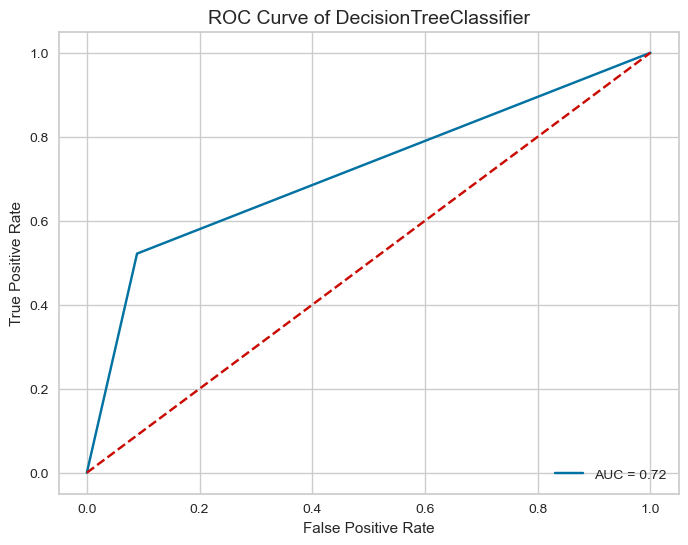

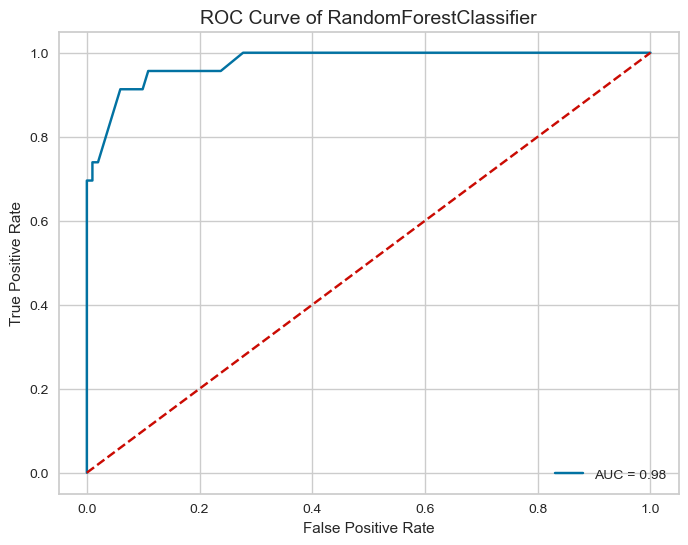

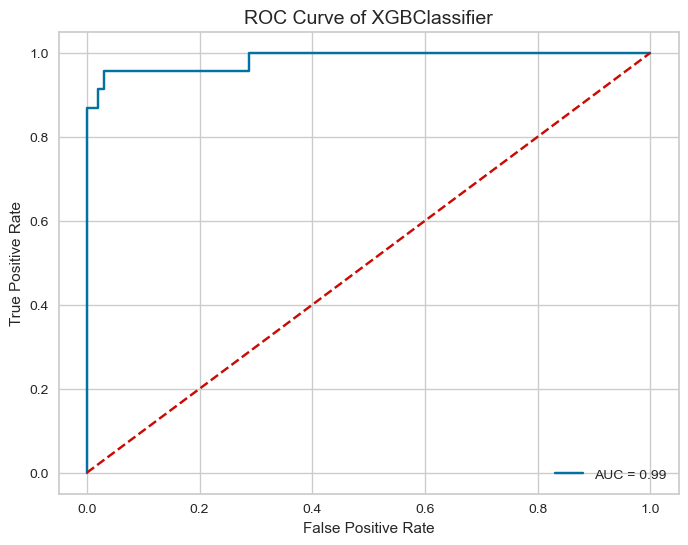

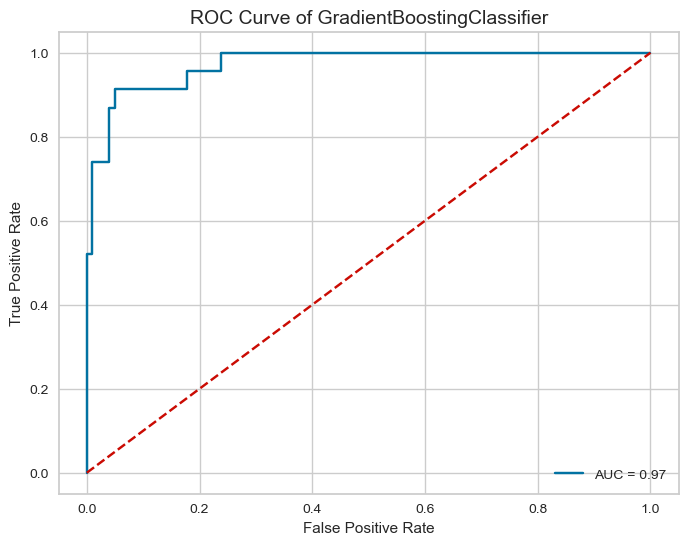

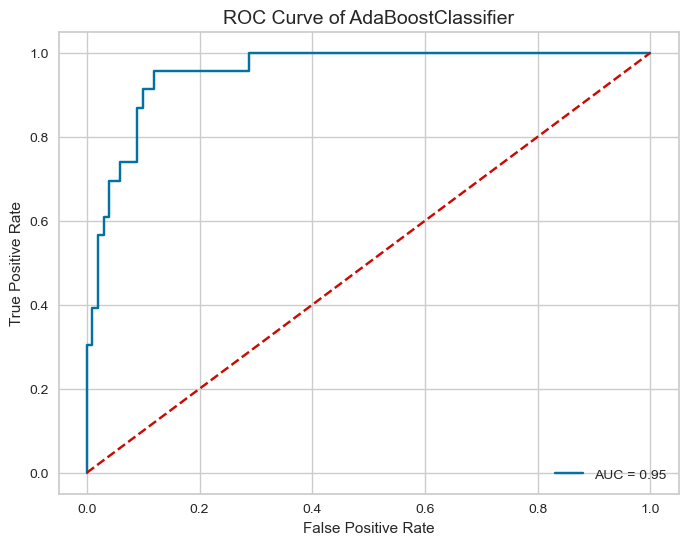

In [191]:
for model in models:

    # ROC Curve:
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize = (8, 6))
    plt.plot(fpr, tpr, label = "AUC = %0.2f" % roc_auc_score(y_test, y_prob))
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend(loc = 'lower right')
    plt.title("ROC Curve of "+model.__class__.__name__, size = 14)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

<h1 style='background:#0E2954; border:3; color:#F2BE22; border-color:#F2BE22; border-style:double;'><center> FEATURE IMPORTANCE
</center></h1> 

In [192]:

features = df.drop('CLASS',axis=1).columns.values
for model in models:
    print("Model: ",model.__class__.__name__)
    tmp = pd.DataFrame({'Feature': features, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    fig=px.bar(tmp,x='Feature',y='Feature importance',color='Feature importance',title="Features importance of "+type(model).__name__,
                labels=dict(x="Feature",y="Feature importance",color="Feature importance"),color_continuous_midpoint=0.8,
                width=600,height=600,template="plotly_dark",color_continuous_scale='tropic')

    fig.show()  
    

Model:  DecisionTreeClassifier


Model:  RandomForestClassifier


Model:  XGBClassifier


Model:  GradientBoostingClassifier


Model:  AdaBoostClassifier


<h1 style='background:#0E2954; border:3; color:#F2BE22; border-color:#F2BE22; border-style:double;'><center> MODEL TUNING
</center></h1> 

In [193]:
# hypermetres tuning:

rf_params={'max_depth': [2, 5, 8, 10],
              'max_features': [2, 5, 8],
                'n_estimators': [10, 500, 1000]}
gb_params={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                'max_depth': [3, 5, 8, 10],
                'n_estimators': [10, 500, 1000]}
xgb_params={'learning_rate': [0.1, 0.01, 0.001],
                'max_depth': [3, 5, 8, 10],
                'n_estimators': [10, 500, 1000]}
ada_params = {"n_estimators": [10, 100, 500, 1000],
                "learning_rate": [0.01, 0.1, 1.0, 10.0]}

# model list:

models=[('RF', RandomForestClassifier(), rf_params),
        ('GB', GradientBoostingClassifier(), gb_params),
        ('XGB', XGBClassifier(), xgb_params),
        ('ADA', AdaBoostClassifier(), ada_params)]

def model_tuning(X,y,cv=3,scoring="accuracy"):
    print("Model tuning is starting...")
    print("Model count: ", len(models))
    print("CV: ", cv)
    print("Scoring: ", scoring)
    print("Model list: ", [i[0] for i in models])
    print("--------------------------------------------------")
    
    best_models={}
    
    for name, model, params in models:
        print(f"Model: {name} is tuning...")
        cv_results=cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(),4)}")
        
        gs_best=GridSearchCV(model, params, cv=cv, n_jobs=-1, verbose=False).fit(X,y)
        final_model=model.set_params(**gs_best.best_params_)
        
        cv_results=cross_validate(final_model, X, y, cv=cv, scoring=scoring, return_train_score=True)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(),4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name]=final_model
    return best_models

best_models=model_tuning(X,y)

Model tuning is starting...
Model count:  4
CV:  3
Scoring:  accuracy
Model list:  ['RF', 'GB', 'XGB', 'ADA']
--------------------------------------------------
Model: RF is tuning...
accuracy (Before): 0.9044
accuracy (After): 0.9125
RF best params: {'max_depth': 8, 'max_features': 8, 'n_estimators': 500}

Model: GB is tuning...
accuracy (Before): 0.9044
accuracy (After): 0.9109
GB best params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 1000}

Model: XGB is tuning...
accuracy (Before): 0.919
accuracy (After): 0.9287
XGB best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

Model: ADA is tuning...
accuracy (Before): 0.8963
accuracy (After): 0.9174
ADA best params: {'learning_rate': 1.0, 'n_estimators': 500}



In [194]:
# FINAL MODEL:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
rfc=RandomForestClassifier(max_depth=8, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500,max_features=8)
xgb=XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5)
gbc=GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.5)
abc=AdaBoostClassifier(learning_rate=0.1, n_estimators=500)

models = [rfc, xgb,gbc, abc]
overral=pd.DataFrame(columns=["Model","Accuracy Score","F1 Score","ROC AUC Score","R2 Score",
                              "Cross Val Score","RMSE","MAE","MSE","precision_score","recall_score"])
for model in models:
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    roc=roc_auc_score(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    cv=cross_val_score(model,X,y,cv=10).mean()
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    pr=precision_score(y_test,y_pred)
    rc=recall_score(y_test,y_pred)
    
    overral=overral._append({"Model":model.__class__.__name__,
                            "Accuracy Score":acc,
                            "F1 Score":f1,
                            "ROC AUC Score":roc,
                            "R2 Score":r2,
                            "Cross Val Score":cv,
                            "RMSE":rmse,
                            "MAE":mae,
                            "MSE":mse,
                            "precision_score":pr,
                            "recall_score":rc},ignore_index=True)
    

overral=overral.sort_values(by="Accuracy Score",ascending=False)
overral=overral.style.background_gradient(cmap="Spectral")
    
overral

<h1 style='background:#0E2954; border:3; color:#F2BE22; border-color:#F2BE22; border-style:double;'><center> CONCLUSION</center></h1> 

* After I have done the Exploratory Data Analysis, I have found out that there are outliers in the dataset. I have used the IQR method to fill the outliers with median. And then I have done data visualization to get insight from data.  I have tried models like RandomForestClassifier, LogisticRegression, KNeighborsClassifier, SVC, GaussianNB, DecisionTreeClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier. After model tuning , I got %94.62 accuracy score from GradientBoostingClassifier.